In [37]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from sklearn.metrics import classification_report


In [38]:
df=pd.read_csv("MK_Stalin.csv")
df

,Tweet
0,Frequent underground bombings in my city. I wa...
1,@kharge Respected leader of opposition the ele...
2,Mr. @mkstalin Today SC slapped you hard on you...
3,"The meeting was attended by ACS, MAWS; Pr. Sec..."
4,@amarprasadreddy @mkstalin Time Has Come Once ...
...,...
74995,@V_Senthilbalaji @mkstalin When will you start...
74996,@tejashwini_v__ @LSEnews @PMOIndia @HCI_London...
74997,@Profdilipmandal @mkstalin @PWilsonDMK Why do ...
74998,Tamil Nadu Government should take steps to set...


In [39]:
def clean_tweet(tweet):
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    return tweet

df['Cleaned_Tweet'] = df['Tweet'].apply(clean_tweet)

In [40]:
from textblob import TextBlob
import nltk
nltk.download('punkt')


def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

df['Sentiment_Score'] = df['Cleaned_Tweet'].apply(get_sentiment)
df['Sentiment'] = df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

[nltk_data] Downloading package punkt to C:\Users\SABARISH
[nltk_data]     KUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


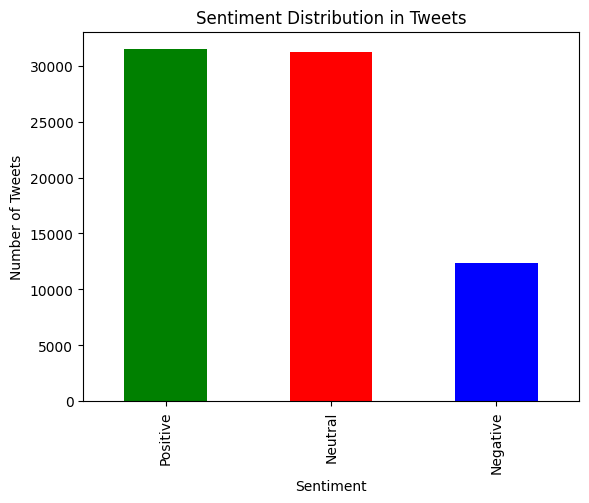

In [41]:
import matplotlib.pyplot as plt

sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Distribution in Tweets')
plt.show()

In [42]:
df.describe()

,Sentiment_Score
count,75000.000000
mean,0.097644
std,0.275712
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.200000
max,1.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tweet            75000 non-null  object 
 1   Cleaned_Tweet    75000 non-null  object 
 2   Sentiment_Score  75000 non-null  float64
 3   Sentiment        75000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.3+ MB


In [44]:
Tweet=df['Tweet']

In [45]:
labeled_tweets=[]
labels=[]
for tweet in Tweet:
    blob = TextBlob(tweet)
    sentiment = blob.sentiment.polarity  # Sentiment polarity ranges from -1 to 1
    labeled_tweets.append(tweet)
    labels.append(1 if sentiment >= 0 else 0)  # Assign label 1 for positive sentiment, 0 for negative sentiment

In [46]:
# Step 3: Feature Extraction
tokenizer = Tokenizer()
tokenizer.fit_on_texts(labeled_tweets)
sequences = tokenizer.texts_to_sequences(labeled_tweets)
word_index = tokenizer.word_index
max_length = max(len(seq) for seq in sequences)
data = pad_sequences(sequences, maxlen=max_length)

In [47]:
# Step 4: Split the Data
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [48]:
# Convert to NumPy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Step 5: Model Training
embedding_dim = 100  # Define the dimensionality of word embeddings

model = Sequential()
model.add(Embedding(len(word_index) + 1, embedding_dim, input_length=max_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

C:\Users\SABARISH KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.8691 - loss: 0.3229 - val_accuracy: 0.9989 - val_loss: 0.0077
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9995 - loss: 0.0041 - val_accuracy: 0.9999 - val_loss: 6.3897e-04
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 1.0000 - loss: 3.7336e-04 - val_accuracy: 1.0000 - val_loss: 1.9582e-04
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 1.0000 - loss: 1.4559e-04 - val_accuracy: 1.0000 - val_loss: 9.4638e-05
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 1.0000 - loss: 7.2331e-05 - val_accuracy: 1.0000 - val_loss: 5.5012e-05
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 1.0000 - loss: 4.1997e-05 - val_accuracy: 1.0000 - val_loss: 3.5088e-05
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 1.0000 - loss: 2.6727e-05 - val_accuracy: 1.0000 - val_loss: 2.3207e-05
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45

In [49]:
# Step 6: Model Evaluation
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 8.2909e-06
Test Loss: 8.121522114379331e-06, Test Accuracy: 1.0


In [50]:
y_pred_prob = model.predict(x_test)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2466
           1       1.00      1.00      1.00     12534

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

